In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC 
from sklearn.model_selection import GridSearchCV



# Read the CSV and Perform Basic Data Cleaning

In [2]:
df = pd.read_csv("cumulative.csv")
df = df.drop(columns=["rowid", "kepid", "kepoi_name", "kepler_name", "koi_pdisposition", "koi_score", "koi_tce_delivname"])
# Drop the null columns where all values are null
df = df.dropna(axis='columns', how='all')
# Drop the null rows
df = df.dropna()
df.head(50)

,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,CONFIRMED,0,0,0,0,9.488036,2.775000e-05,-2.775000e-05,170.538750,0.002160,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,CONFIRMED,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
2,FALSE POSITIVE,0,1,0,0,19.899140,1.494000e-05,-1.494000e-05,175.850252,0.000581,...,-176.0,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
3,FALSE POSITIVE,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,...,-174.0,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
4,CONFIRMED,0,0,0,0,2.525592,3.761000e-06,-3.761000e-06,171.595550,0.001130,...,-211.0,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
5,CONFIRMED,0,0,0,0,11.094321,2.036000e-05,-2.036000e-05,171.201160,0.001410,...,-232.0,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714
6,CONFIRMED,0,0,0,0,4.134435,1.046000e-05,-1.046000e-05,172.979370,0.001900,...,-232.0,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714
7,CONFIRMED,0,0,0,0,2.566589,1.781000e-05,-1.781000e-05,179.554370,0.004610,...,-232.0,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714
8,FALSE POSITIVE,0,1,1,0,7.361790,2.128000e-05,-2.128000e-05,132.250530,0.002530,...,-124.0,3.986,0.182,-0.098,1.958,0.322,-0.483,298.86435,42.151569,12.660
9,CONFIRMED,0,0,0,0,16.068647,1.088000e-05,-1.088000e-05,173.621937,0.000517,...,-83.0,4.485,0.083,-0.028,0.848,0.033,-0.072,286.99948,48.375790,15.841


In [3]:
df.shape

(8744, 41)

In [4]:
# y = df["koi_disposition"]
# X = df.drop(columns=["koi_disposition"])

# X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify=y)

# Create a Train Test Split

Use `koi_disposition` for the y values

In [5]:
y = df["koi_disposition"]
y_reshape = y.values.reshape(-1,1)
X = df.drop(columns=["koi_disposition"])

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify=y)

In [6]:
X_train.head(20)

,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
5964,1,0,0,0,252.044440,2.749000e-02,-2.749000e-02,265.201000,0.049400,-0.049400,...,-136.0,4.621,0.041,-0.035,0.664,0.057,-0.059,292.79022,41.948639,15.884
9410,1,0,0,0,371.518520,1.579000e-02,-1.579000e-02,317.683600,0.033900,-0.033900,...,-206.0,4.377,0.101,-0.203,1.089,0.364,-0.145,293.06400,45.034210,13.731
4204,0,0,1,0,8.038670,1.136000e-04,-1.136000e-04,135.309800,0.012300,-0.012300,...,-181.0,4.485,0.050,-0.200,0.975,0.282,-0.101,290.51785,41.238762,14.999
5933,0,0,0,0,18.782160,4.061000e-04,-4.061000e-04,147.850800,0.014800,-0.014800,...,-167.0,4.488,0.048,-0.290,0.940,0.386,-0.087,291.76413,41.860130,14.043
6996,1,0,1,0,12.429716,4.724000e-04,-4.724000e-04,141.284600,0.042000,-0.042000,...,-200.0,4.534,0.037,-0.213,0.905,0.281,-0.088,297.52072,40.585419,15.842
6599,0,0,0,0,9.011888,1.624000e-03,-1.624000e-03,138.658000,0.248000,-0.248000,...,-169.0,4.002,0.413,-0.138,1.735,0.389,-0.723,299.19171,45.343540,14.321
3193,0,0,0,0,16.665899,2.970000e-05,-2.970000e-05,180.202150,0.001450,-0.001450,...,-114.0,4.446,0.034,-0.128,1.032,0.159,-0.057,284.52118,41.629601,14.387
1330,0,0,0,0,36.515764,1.073000e-04,-1.073000e-04,151.289890,0.002400,-0.002400,...,-77.0,4.540,0.052,-0.021,0.781,0.030,-0.045,283.60526,39.997978,14.254
6491,0,1,0,0,25.285232,5.520000e-07,-5.520000e-07,135.966201,0.000017,-0.000017,...,-194.0,4.337,0.104,-0.127,1.136,0.232,-0.155,297.69446,47.878960,12.138
4223,0,0,0,0,2.049602,8.793000e-06,-8.793000e-06,132.326390,0.003460,-0.003460,...,-159.0,4.589,0.035,-0.112,0.780,0.133,-0.061,289.18149,51.562538,15.277


# Pre-processing

Scale the data using the MinMaxScaler

In [7]:
X_train.shape

(6558, 40)

In [8]:
scaler = MinMaxScaler()
# scaler.fit()
X_train_scaled=scaler.fit(X_train).transform(X_train)
X_test_scaled = scaler.fit(X_test).transform(X_test)


C:\Users\Shivam\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
C:\Users\Shivam\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


# Train the Support Vector Machine

In [9]:
import tensorflow as tf
# tf.keras.models
# tf.keras.layers

In [10]:
le = LabelEncoder()

In [11]:
le.fit(y_train)

LabelEncoder()

In [12]:
y_train_encoded = le.transform(y_train)
y_train_encoded.reshape(-1,1)


array([[2],
       [2],
       [2],
       ...,
       [0],
       [2],
       [0]])

In [13]:
# y_train_scaled=scaler.fit(y_train).transform(X_train)
# y_train_scaled = scaler.fit(y_train_encoded).transform(y_train_encoded)

In [14]:
y_test_encoded = le.transform(y_test)
y_test_encoded

array([2, 0, 1, ..., 1, 2, 1])

In [15]:
from keras.utils import to_categorical

Using TensorFlow backend.


In [16]:
y_test_catergorical = to_categorical(y_test_encoded.astype('int64'))
y_test_catergorical

array([[0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       ...,
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.]], dtype=float32)

In [17]:
y_train_categorical = to_categorical(y_train_encoded.astype('int64'))
y_train_categorical


array([[0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       ...,
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.]], dtype=float32)

In [18]:
y_train_categorical.shape

(6558, 3)

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [20]:
y_reshape

array([['CONFIRMED'],
       ['CONFIRMED'],
       ['FALSE POSITIVE'],
       ...,
       ['CANDIDATE'],
       ['FALSE POSITIVE'],
       ['FALSE POSITIVE']], dtype=object)

ValueError: operands could not be broadcast together with shapes (2186,) (6558,) 

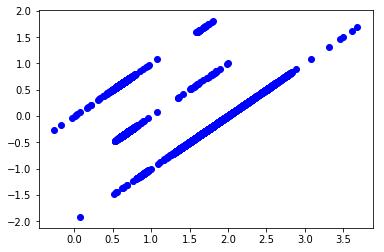

In [23]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
model = LinearRegression()
model.fit(X_train_scaled, y_train_encoded)
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_encoded, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_train_encoded, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_train_encoded.min(), xmax=y_train_encoded.max())
plt.title("Residual Plot")
plt.show()

In [27]:
print(X_test_scaled.shape)
print(y_train_categorical.shape)
print()
print()

(2186, 40)
(6558, 3)




In [32]:
model = Sequential()
model.add(Dense(units=100, activation='relu', input_dim=40))
model.add(Dense(units=3, activation='softmax'))

In [33]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [34]:
model.fit(
    X_train_scaled,
    y_train_categorical,
    epochs=100,
    shuffle=True,
    verbose=2
)

Instructions for updating:
Use tf.cast instead.
Epoch 1/100
 - 2s - loss: 0.6822 - acc: 0.6969
Epoch 2/100
 - 1s - loss: 0.3983 - acc: 0.8094
Epoch 3/100
 - 1s - loss: 0.3671 - acc: 0.8140
Epoch 4/100
 - 1s - loss: 0.3515 - acc: 0.8278
Epoch 5/100
 - 1s - loss: 0.3428 - acc: 0.8341
Epoch 6/100
 - 1s - loss: 0.3368 - acc: 0.8396
Epoch 7/100
 - 1s - loss: 0.3319 - acc: 0.8432
Epoch 8/100
 - 1s - loss: 0.3268 - acc: 0.8475
Epoch 9/100
 - 1s - loss: 0.3232 - acc: 0.8515
Epoch 10/100
 - 1s - loss: 0.3192 - acc: 0.8518
Epoch 11/100
 - 1s - loss: 0.3176 - acc: 0.8542
Epoch 12/100
 - 1s - loss: 0.3114 - acc: 0.8622
Epoch 13/100
 - 1s - loss: 0.3113 - acc: 0.8626
Epoch 14/100
 - 1s - loss: 0.3070 - acc: 0.8626
Epoch 15/100
 - 1s - loss: 0.3040 - acc: 0.8628
Epoch 16/100
 - 1s - loss: 0.3017 - acc: 0.8657
Epoch 17/100
 - 1s - loss: 0.3021 - acc: 0.8625
Epoch 18/100
 - 1s - loss: 0.3003 - acc: 0.8666
Epoch 19/100
 - 1s - loss: 0.2980 - acc: 0.8675
Epoch 20/100
 - 1s - loss: 0.2946 - acc: 0.8695
E

In [36]:
print(f"Training Data Score: {model.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {model.score(X_test_scaled, y_test)}")

AttributeError: 'Sequential' object has no attribute 'score'

# Hyperparameter Tuning

Use `GridSearchCV` to tune the `C` and `gamma` parameters

In [ ]:
# Create the GridSearchCV model

In [ ]:
# Train the model with GridSearch

In [ ]:
print(grid2.best_params_)
print(grid2.best_score_)